In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import numpy as np
import pathlib
import glob
import tensorflow as tf
# from tensorflow.keras.applications.inception_v3 import preprocess_input
import matplotlib.pyplot as plt
from IPython.display import Image, display
import cv2
%matplotlib inline

/anaconda3/envs/garbage_cls/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/envs/garbage_cls/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/envs/garbage_cls/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/envs/garbage_cls/lib/python3.7/site-packages/tensorflow/

In [3]:
print(tf.__version__)

2.0.0-alpha0


In [4]:
data_path = "../data"
data_p = pathlib.Path(data_path)

In [5]:
def _preprocess_imagefile(filename, IMAGE_SIZE=299):
    try:
        # read file as byte
        image_string = tf.io.read_file(filename)
        # decode as string 
        image_decoded = tf.image.decode_jpeg(image_string, channels=3)
        # image_decoded = tf.image.decode_gif(image_string)
        ## P.S tf.image.decode_image return shapeless tensor.
        # image_decoded = tf.image.decode_image(image_string)
        
        # resize to given image size
        image_resized = tf.image.resize(image_decoded, (IMAGE_SIZE, IMAGE_SIZE))
        # normailization
        image_normalized = (tf.cast(image_resized, tf.float32)/127.5) - 1
    
        return image_normalized
        """image_casted = tf.cast(image_decoded, tf.float32)
        image_resized = tf.image.resize(image_casted, (IMAGE_SIZE, IMAGE_SIZE))
        image_preproc = tf.keras.applications.inception_v3.preprocess_input(image_resized)
        
        return image_preproc, label"""
    
    except Exception as e:
        print(e)
        print(filename)

In [6]:
images_list = [str(p) for p in list(data_p.glob("./*"))]

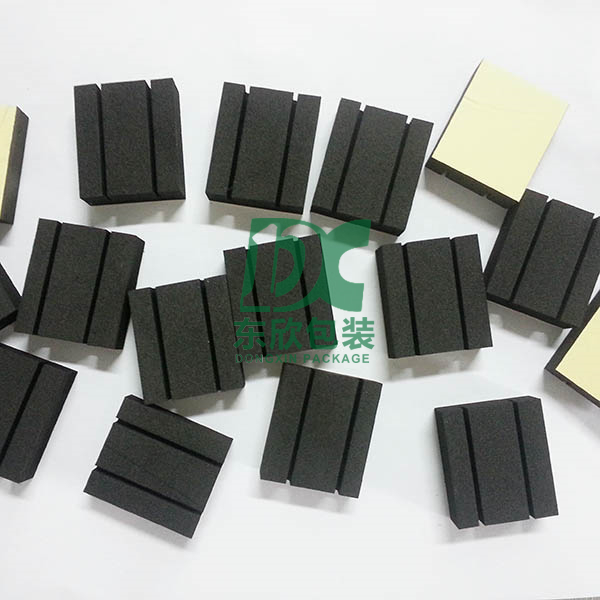

(600, 600, 3)


In [7]:
sample_image = np.random.choice(images_list)
sample_im = cv2.imread(sample_image)
display(Image(sample_image))
print(sample_im.shape)

In [8]:
model_path = "../models/"
model_p = pathlib.Path(model_path)
model_file = model_path + "epoch_40_adam_without_drop_out.h5"

In [9]:
model_file

'../models/epoch_40_adam_without_drop_out.h5'

In [10]:
%%time
cls = tf.keras.models.load_model(model_file)

In [15]:
level0_label_dict = {}
level0_labels = ['可回收物', "有害垃圾", "湿垃圾", "干垃圾"]
encoded_level0_labels = [0,2,3,1]
level0_label_dict = {ll[0]:ll[1] for ll in zip(encoded_level0_labels, level0_labels)}

In [35]:
%%time
random_filename = np.random.choice(images_list)
print(random_filename)
basename = random_filename.split("/")[-1].split(".")[0]
name_seg = basename.split("_")
sub_id = name_seg.pop()
sample = name_seg.pop()
labels = {"level"+str(i):l for i,l in enumerate(name_seg)}
print(labels['level0'])
random_x = _preprocess_imagefile(random_filename)
# print(random_x)
pred_y = cls.predict(tf.expand_dims(random_x, axis=0))
print(pred_y)
print(level0_label_dict[pred_y.argmax()])

../data/湿垃圾_瓜皮果核_西瓜皮_11.jpg
湿垃圾
[[0.30822292 0.06754021 0.00090766 0.62332916]]
湿垃圾
CPU times: user 514 ms, sys: 125 ms, total: 639 ms
Wall time: 302 ms


In [32]:
level0_label_dict

{0: '可回收物', 2: '有害垃圾', 3: '湿垃圾', 1: '干垃圾'}

In [33]:
print("\u6e7f\u5783\u573e")

湿垃圾
